# A general biophysical model

This notebook describes the equations and parameters of the general biophysical (or conductance-based) model used in this tutorial. 


In [68]:
using DifferentialEquations, Plots, Plots.PlotMeasures, LaTeXStrings
default(fmt = :png)
include("/home/aurelien/Desktop/uni/m2q1/neuro1/notebook1/essentials.jl")

Xinf_inv (generic function with 1 method)

# Conductance-based modeling
A general, single compartment biophysical neuron model consists of the voltage-current equation

$
C \dot V = - \bar{G}_{l}(V-E_{l}) - I_{int}(V,t) + I_{ext}(t)
$

where $V$ is the membrane potential, $C$ the membrane capacitance, the term $\bar{G}_{l}(V-E_{l})$ models the passive leak current, $I_{int}(V,t)$ is the internal current and $I_{ext}(t)$ any externally applied current. The internal current $I_{int}(V,t)$ is described as a sum of independent voltage-dependent current sources

$
I_{int}(V,t) = \sum_i I_{i}(V,t) = \sum_i G_{i}(V,t)(V-E_i)
$

each modeling a specific ion channel type. $I_{int}(V,t)$ is composed of as many voltage-dependent current sources as there are voltage-gated channel types embedded in neuron membrane. These channels are called "voltage-dependent" because their conductance $G_{i}(V,t)$ dependents on time and voltage. 

A specific conductance-based model is characterized by the specific set of voltage-dependent current sources used to describe $I_{int}(V,t)$, each channel being defined by its ionic permeability (affecting the reversal potential $E_i$) and the dynamics of its voltage-gated conductance $G_{i}(V,t)$. The dynamics of $G_{i}(V,t)$ is usually modeled as

$
G_{i}(V,t) = \bar{G}_i m_i^p h_i^q 
$

where $\bar{G}_i$ is the channel maximal conductance, $m_i \in [0,1]$ its activation gate and $h_i \in [0,1]$ its inactivation gate and $p,q$ are two integer exponents. An activation gate opens as $V$ increases (activation) and closes as $V$ decreases (deactivation). An inactivation gate closes as $V$ increases (inactivation) and opens as $V$ decreases (deinactivation). The dynamics of each activation/inactivation gate is modeled by the ODE

$
\dot{m}_{i} = \frac{m_{i,\infty}(V)-m_i}{\tau_{m_i}(V)}
$

where $m_{i,\infty}(V)$ is a voltage dependent, steady-state activation function and $\tau_{m_i}(V)$ a voltage-dependent time constant. It leads to the conductance-based model described by the set of ODEs


\begin{eqnarray}
C \dot V &=& - \bar{G}_{leak}(V-E_{leak}) - \sum_i \bar{G}_i m_i^p h_i^q (V-E_i) + I_{ext}(t)\\
\dot{m}_{i} &=& \frac{m_{i,\infty}(V)-m_i}{\tau_{m_i}(V)} \quad\mbox{for } i=1:n\\
\dot{h}_{i} &=& \frac{h_{i,\infty}(V)-h_i}{\tau_{h_i}(V)} \quad\mbox{for } i=1:n
\end{eqnarray}


# Model definition
The general biophysical model used in this book is composed of seven voltage-gated currents and one calcium-gated current. It is described by the voltage-current equation

\begin{eqnarray}
C \dot V = &-& \bar{G}_{l}(V-E_{l}) - G_{Na}(V,t)(V-E_{Na}) - G_{K,d}(V,t)(V-E_K) - G_{A,f}(V,t)(V-E_K) - G_{A,s}(V,t)(V-E_K) \\
            &-& G_{Ca,T}(V,t)(V-E_{Ca}) - G_{Ca,L}(V,t)(V-E_{Ca}) - G_{H}(V,t)(V-E_H) - G_{K,Ca}([Ca^{2+}]_{in},t)(V-E_K) + I_{ext}(t).
\end{eqnarray}

Each voltage-gated conductance is modeled using the activation($m$)/inactivation($h$) gate formalism. The specific functions for each gate activation/inactivation function and time-constant are not described explicitely but are coded and plotted below. For simplicity and to avoid overparametrization, every exponents $p$ and $q$ is set to either zero (variable not present) or one (variable present).

#### Transient sodium current
$G_{Na}(V,t)(V-E_{Na})$ is a transient sodium current that activates on a fast timescale and inactivates on a slower timescale. Its conductance is described as 

$$G_{Na}(V,t)=\bar{G}_{Na}m_{Na}h_{Na}.$$

#### Delayed-rectifier potassium current
$G_{K,d}(V,t)(V-E_K)$ is a potassium current that activates on a slow timescale and does not inactivate. Its conductance is described as 

$$G_{K,d}(V,t)=\bar{G}_{K,d}m_{K,d}.$$

#### fast A-type potassium current
$G_{A,f}(V,t)(V-E_K)$ is a potassium current that activates on a fast timescale and inactivates on a slow timescale. Its conductance is described as 

$$G_{A,f}(V,t)=\bar{G}_{A,f}m_{A,f}h_{A,f}.$$

#### slow A-type potassium current
$G_{A,s}(V,t)(V-E_K)$ is a potassium current that activates on a slow timescale and inactivates on an ultraslow timescale. Its conductance is described as 

$$G_{A,s}(V,t)=\bar{G}_{A,s}m_{A,s}h_{A,s}.$$

#### L-type calcium current
$G_{Ca,L}(V,t)(V-E_{Ca})$ is a high-threshold calcium current that activates on a slow timescale and does not inactivate. Its conductance is described as 

$$G_{Ca,L}(V,t)=\bar{G}_{Ca,L}m_{Ca,L}.$$

#### T-type calcium current
$G_{Ca,T}(V,t)(V-E_{Ca})$ is a low-threshold calcium current that activates on a slow timescale and inactivates on an ultraslow timescale. Its conductance is described as 

$$G_{Ca,T}(V,t)=\bar{G}_{Ca,T}m_{Ca,T}h_{Ca,T}.$$

#### H-current
$G_{H}(V,t)(V-E_H)$ is a cation current that is activated by hyperpolarization. It is permeable to both sodium and potassium ions, wich explains its specific reversal potential $E_H$. Its conductance is described as 

$$G_{H}(V,t)=\bar{G}_{H}m_{H}.$$

#### Calcium-activated potassium current
$G_{K,Ca}([Ca^{2+}]_{in},t)(V-E_K)$ is a potassium current that is activated by a rise intrallular calcium concentration $[Ca^{2+}]_{in}$. It is calcium-gated rather than voltage-gated. Its conductance is described as 

$$G_{K,Ca}([Ca^{2+}]_{in},t)=\bar{G}_{K,Ca}m_{K,Ca,\infty}([Ca^{2+}]_{in}).$$

The next two cells code and plot the voltage-dependent activation/inactivation functions and time-constant for each voltage-gated currents.

In [69]:
## Model gating functions
# All activation and inactivation curves are defined by the Boltzman function
Xinf(V,A,B)=1/(1+exp((V+A)/B))

# All timeconstant curves are defined by the shifted Boltzman function
tauX(V,A,B,D,E)=A-B/(1+exp((V+D)/E))

# Sodium current
mNainf(V) = Xinf(V,25.,-5.); tau_mNa(V) = tauX(V,0.75,0.5,100.,-20.)
hNainf(V) = Xinf(V,40.,10.); tau_hNa(V) = tauX(V,4.0,3.5,50.,-20.)

# Potassium currents
mKdinf(V) = Xinf(V,15.,-10.); tau_mKd(V) = tauX(V,5.0,4.5,30.,-20.)

mAfinf(V) = Xinf(V,80,-10.); tau_mAf(V) = tauX(V,0.75,0.5,100.,-20.)
hAfinf(V) = Xinf(V,60,5.); tau_hAf(V) = 10*tauX(V,0.75,0.5,100.,-20.)

mAsinf(V) = Xinf(V,60,-10.); tau_mAs(V) = 10*tauX(V,0.75,0.5,100.,-20.)
hAsinf(V) = Xinf(V,20,5.); tau_hAs(V) = 100*tauX(V,0.75,0.5,100.,-20.)

mKCainf(Ca) = Xinf(Ca,-30.0,-10.); tau_mKCa = 500.

# Calcium currents
mCaLinf(V) = Xinf(V,45.,-5.); tau_mCaL(V) = tauX(V,6.0,5.5,30.,-20.)

# mCaLinf(V) = Xinf(V,35.,-5.); for Type V 
mCaTinf(V) = Xinf(V,55,-5.); tau_mCaT(V) = tauX(V,6.0,5.5,30.,-20.)
hCaTinf(V) = Xinf(V,70,10.); tau_hCaT(V) = 100*tauX(V,6.0,5.5,30.,-20.)

# Cation current (H-current)
mHinf(V) = Xinf(V,85,10.); tau_mH(V) = 50*tauX(V,6.0,5.5,30.,-20.);

tau_Ca = 500.

500.0

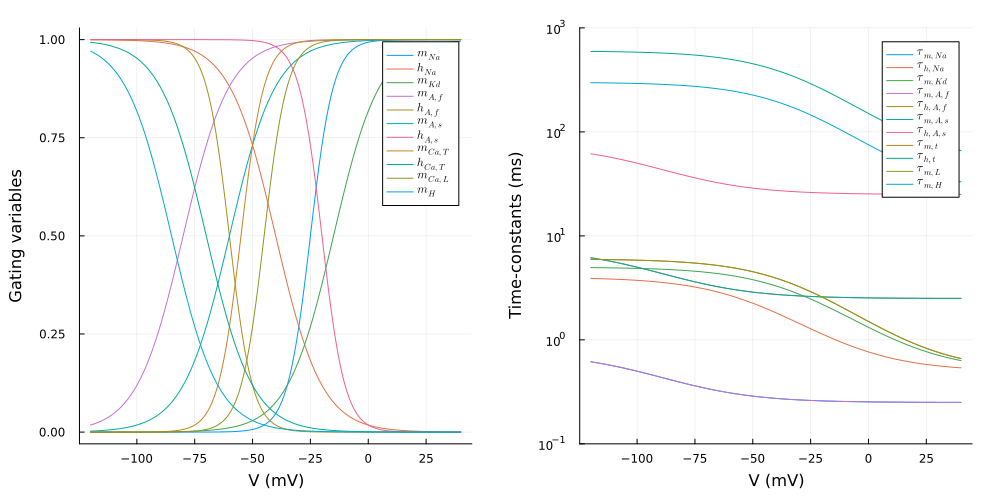

In [70]:
## This cell plots the activation/inactivation functions and time-constants

Vplot = range(-120., step=1e-2, stop=40.)

p1 = plot()
plot!(Vplot,mNainf.(Vplot),label=L"m_{Na}")
plot!(Vplot,hNainf.(Vplot),label=L"h_{Na}")
plot!(Vplot,mKdinf.(Vplot),label=L"m_{Kd}")
plot!(Vplot,mAfinf.(Vplot),label=L"m_{A,f}")
plot!(Vplot,hAfinf.(Vplot),label=L"h_{A,f}")
plot!(Vplot,mAsinf.(Vplot),label=L"m_{A,s}")
plot!(Vplot,hAsinf.(Vplot),label=L"h_{A,s}")
plot!(Vplot,mCaTinf.(Vplot),label=L"m_{Ca,T}")
plot!(Vplot,hCaTinf.(Vplot),label=L"h_{Ca,T}")
plot!(Vplot,mCaLinf.(Vplot),label=L"m_{Ca,L}")
plot!(Vplot,mHinf.(Vplot),label=L"m_{H}")
xlabel!("V (mV)")
ylabel!("Gating variables")

p2 = plot()
plot!(Vplot,tau_mNa.(Vplot), label=L"\tau_{m,Na}")
plot!(Vplot,tau_hNa.(Vplot),label=L"\tau_{h,Na}")
plot!(Vplot,tau_mKd.(Vplot),label=L"\tau_{m,Kd}")
plot!(Vplot,tau_mAf.(Vplot),label=L"\tau_{m,A,f}")
plot!(Vplot,tau_hAf.(Vplot),label=L"\tau_{h,A,f}")
plot!(Vplot,tau_mAs.(Vplot),label=L"\tau_{m,A,s}")
plot!(Vplot,tau_hAs.(Vplot),label=L"\tau_{h,A,s}")
plot!(Vplot,tau_mCaT.(Vplot),label=L"\tau_{m,t}")
plot!(Vplot,tau_hCaT.(Vplot),label=L"\tau_{h,t}")
plot!(Vplot,tau_mCaL.(Vplot),label=L"\tau_{m,L}")
plot!(Vplot,tau_mH.(Vplot),label=L"\tau_{m,H}")
plot!(ylims=(0.1,1000),yaxis=:log10)
xlabel!("V (mV)")
ylabel!("Time-constants (ms)")

gating = plot(p1,p2,layout=(1,2),size=(1000,500),margin=20px)

#savefig(gating,"23-gating-functions.pdf")

The next cell set parameter values for Nernst potentials, membrane capacitance and calcium dynamics. Calcium dynamics is modeled as

$$\frac{d[Ca^{2+}]_{in}}{dt} = (1/\tau_{Ca}) (-αg_{CaL}m_{CaL}(V-V_{Ca})-βg_{CaT}m_{CaT}h_{CaT}(V-V_{Ca}) - [Ca^{2+}]_{in})$$

In [71]:
## Constant simulation parameters

## Definition of reversal potential values. 
const VNa = 40.; # Sodium reversal potential
const VK = -90.; # Potassium reversal potential
const VCa = 120.; # Calcium reversal potential
const VH= -40.; # Reversal potential for the H-current (permeable to both sodium and potassium ions)
const Vl = -50.; # Reversal potential of leak channels

const C=0.1; # Membrane capacitance
const α=0.1; # Calcium dynamics (L-current)
const β=0.1; # Calcium dynamics (T-current)

## 1. Spike excitability and spiking
We start by only considering the transient sodium current and the delayed-rectifier potassium current. These are the current types originally measured and modeled by Hodgkin and Huxley. They constitute the basic building blocks of spike excitability and spiking in most neuron types. All other maximal conductances are set to zero.

<blockquote>Create a function called CBM_ODE(du,u,p,t) that models the conductance-based model described above. u is a vector of variables 
    $$u=(V; m_{Na}; h_{Na}; m_{Kd}; m_{Af}; h_{Af}; m_{As}; h_{As}; m_{CaL}; m_{CaT}; h_{CaT}; m_{H}; Ca),$$ 
    and p is a vector of parameters 
    $$p=(I_{app},I_{t},G_{Na},G_{Kd},G_{Af},G_{As},G_{KCa},G_{CaL},G_{CaT},G_{H},G_{l})$$ </blockquote>

In [72]:
function CBM_ODE(du, u, p, t)
    i_app, i_t , g_na, g_kd, g_af, g_as, g_kca, g_cal, g_cat, g_h, g_l = p
    

    g_leak_term = g_l  *(u[1] - Vl)
    g_na_term   = g_na *(u[1] - VNa)*u[2]*u[3]
    g_kd_term   = g_kd *(u[1] - VK) *u[4]
    g_af_term   = g_af *(u[1] - VK) *u[5]*u[6]
    g_as_term   = g_as *(u[1] - VK) *u[7]*u[8]
    g_CaL_term  = g_cal*(u[1] - VCa)*u[9]
    g_CaT_term  = g_cat*(u[1] - VCa)*u[10]*u[11]
    g_H_term    = g_h  *(u[1] - VH) *u[12]
    g_KCa_term  = g_kca*(u[1] - VK) *mKCainf(u[13])

    sum = g_na_term + g_kd_term + g_af_term + g_as_term + g_CaL_term + g_CaT_term + g_H_term + g_KCa_term

    #d V/dt
    du[1] = (1/C) * (- g_leak_term - sum + i_app + i_t(t)) 

    #d m_na / dt
    du[2] = (mNainf(u[1]) - u[2]) / tau_mNa(u[1])
    
    #d h_na / dt
    du[3] = (hNainf(u[1]) - u[3]) / tau_hNa(u[1])

    #d m_kd / dt
    du[4] = (mKdinf(u[1]) - u[4]) / tau_mKd(u[1])

    #d m_Afast / dt
    du[5] = (mAfinf(u[1]) - u[5]) / tau_mAf(u[1])

    #d h_Afast / dt
    du[6] = (hAfinf(u[1]) - u[6]) / tau_hAf(u[1])

    #d m_Aslow / dt
    du[7] = (mAsinf(u[1]) - u[7]) / tau_mAs(u[1])

    #d m_Aslow / dt
    du[8] = (hAsinf(u[1]) - u[8]) / tau_hAs(u[1])

    #d m_Cal / dt
    du[9] = (mCaLinf(u[1]) - u[9])/ tau_mCaL(u[1])

    #d m_Cat / dt
    du[10]= (mCaTinf(u[1]) - u[10])/tau_mCaT(u[1])

    #d h_cat / dt
    du[11]= (hCaTinf(u[1]) - u[11])/tau_hCaT(u[1])

    #d m_h / dt
    du[12]= (mHinf(u[1]) - u[12])  /tau_mH((u[1]))

    #d Ca / dt
    du[13]=(1/tau_Ca)*((-α*g_cal*u[9]*(u[1] - VCa)) - (β*g_cat*u[10]*u[11]*(u[1] - VCa)) - u[13])
    
end

CBM_ODE (generic function with 1 method)

The following cell simulates model response to a pulse and a step input of excitatory current. 

<blockquote>Simulate the model for different values of pulse current and step input current and describe what you observe. </blockquote>

In [73]:
## Definition of maximal conductance values. 
Gl=2.0; # Leak current maximal conductance
GNa=100.; # Sodium current maximal conductance
GKd=65.; # Delayed-rectifier potassium current maximal conductance
GAf=0.; # Fast A-type potassium current maximal conductance
GAs=0.; # Slow A-type potassium current maximal conductance
GKCa=0.; # Calcium-activated potassium current maximal conductance
GCaL=0.; # L-type calcium current maximal conductance
GCaT=0.; # T-type calcium current maximal conductance
GH=0.; # H-current maximal conductance

## Initial conditions
V0= -70.; mNa0=mNainf(V0); hNa0=hNainf(V0); mKd0=mKdinf(V0); mAf0=mAfinf(V0); hAf0=hAfinf(V0);
mAs0=mAsinf(V0); hAs0=hAsinf(V0); mCaL0=mCaLinf(V0); mCaT0=mCaTinf(V0); hCaT0=hCaTinf(V0); mH0=mHinf(V0) 
Ca0=(-α*GCaL*mCaL0*(V0-VCa))+(-β*GCaT*mCaT0*hCaT0*(V0-VCa))

x0 = [V0; mNa0; hNa0; mKd0; mAf0; hAf0; mAs0; hAs0; mCaL0; mCaT0; hCaT0; mH0; Ca0]

## Definition of simulation time.
Tfinal=1000.0
tspan=(0.0,Tfinal)

## Input current defition
# Constant current
Iapp=0.

# Current pulses
I1=5. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=250.1 # Ending time of first pulse
I2= 31. # Amplitude of second pulse
ti2=500 # Starting time of second pulse
tf2=1001 # Ending time of second pulse

It(t)=I1*pulse(t,ti1,tf1)+I2*pulse(t,ti2,tf2) ## Time-varying current

## Current-clamp experiment
# Parameter vector for simulations
p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa,GCaL,GCaT,GH,Gl)

# Simulation
prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
sol = solve(prob,dtmax=0.1);

#Figure generation in the next (hidden cell)

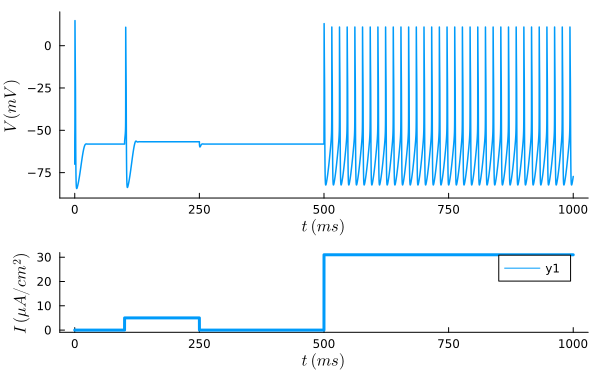

In [74]:
## Generation of figures 
# Voltage response
p1=plot(sol.t, sol[1,:],linewidth=1.5,legend=false,ylims=(-90,20))
ylabel!(L"V\ (mV)")
xlabel!(L"t\ (ms)")

# Input current
t=range(0.0,Tfinal,length=10000)
p2=plot(t,Iapp .+ It.(t),linewidth=3)
xlabel!(L"t\ (ms)")
ylabel!(L"I\ (\mu A/cm^2)")

l = @layout [
    a{1.0*w,0.7*h}
    b{1.0*w,0.3*h}
]

CC=plot(p1,p2,layout=l,grid=false,size=(600,375))#,xlims=(35,55))

#savefig(CC,"11-Currentclamp-spikeExc.pdf")

### Student Response :

Increasing the step amplitude from 0 to 5 changes the neuron from not spiking to spiking. The firing seems to be around 5 µA/cm².

Increasing further the amplitude of the stimulating current increases the firing frequency of the neuron. However, the maximum potential difference of the spikes does not vary.

## 2. FI curves

We now focus on neuron response to a constant input current of different values. To characterize this response, we will plot a function that plots spiking frequency over applied current, called an f-I curve. 

<blockquote>Write a function that takes the voltage vector as input and computes the firing frequency.

Use that function to compute and plot a neuron f-I curve. </blockquote>

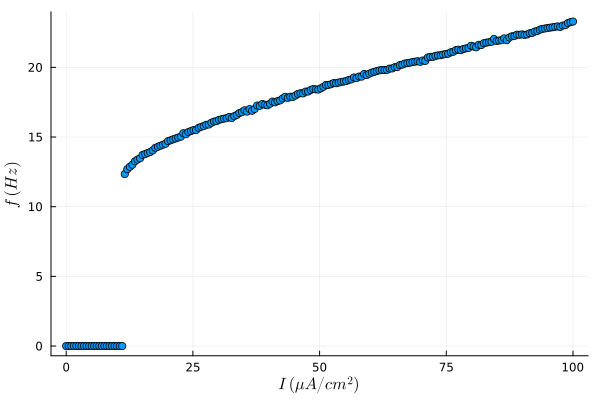

In [75]:
ti1=1 # Starting time of pulse
tf1=2001 # Ending time of pulse

Tfinal=2000.0
tspan=(0.0,Tfinal)


function compute_spike_frequency(V_range)
    # we detect a spike with an above threshold values
    threshold = 0

    above_th = []
    above_th = V_range .> 0

    # consider as spike the first value above threshhold
    prev_val = 0
    spikes = zeros(size(V_range))

    for i = 1:length(V_range)
        
        if (prev_val == 0 ) && (above_th[i] == 1)
            spikes[i] = 1 
        
        end
        prev_val = above_th[i]
    end

    spike_indexes = findall(!iszero, spikes)

    if size(spike_indexes)[1] < 2 
        # case where no spiking takes place
        return 0
    end

    time_interval = spike_indexes[size(spike_indexes)[1]] - spike_indexes[size(spike_indexes)[1]-1]

    dt = tspan[2] / size(V_range)[1] # en ms

    f = 1/((time_interval * dt)/1000) # en Hz

    return f
end

function compute_FI_values(stim_currents)

    I = stim_currents
    frequencies = zeros(size(I)[1])
    
    for i = 1:length(I)

        Iapp = 0.
        # Current pulse
        I1= I[i] # Amplitude of pulse
        ti1=1 # Starting time of first pulse
        tf1=501 # Ending time of first pulse
        
        It(t)=I1*pulse(t,ti1,tf1) ## Time-varying current
        
        Tfinal=500.0
        tspan=(0.0,Tfinal)
        
        p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa,GCaL,GCaT,GH,Gl)
        
        prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
        sol = solve(prob,dtmax=0.1);
        frequencies[i] = compute_spike_frequency(sol[1,:] )

    end

    return frequencies
end

stim_currents = range(0, 100, 200)
freqs = compute_FI_values(stim_currents)

p1=scatter(stim_currents, freqs,legend=false)
ylabel!(L"f\ (Hz)")
xlabel!(L"I\ (\mu A/cm^2)")


## 3. Effect of A-type potassium current

We will now add the effect of a new type of potassium current, called the fast A-type potassium current. 

<blockquote>What are the main differences between the fast A-type potassium current and delayed-rectifier potassium current already present in the model? Simulate the model with A-type potassium current in spiking mode. 
    
   
   Plot neuron f-I curves for $G_{As}=10$ and $G_{As}=20$. What is the main effect of adding this current in the model? Illustrate your observation with a simulation for a specific applied current.</blockquote>
   
Beware that adding ion channels to the membrane increases global membrane conductance, which changes its response to input current. 

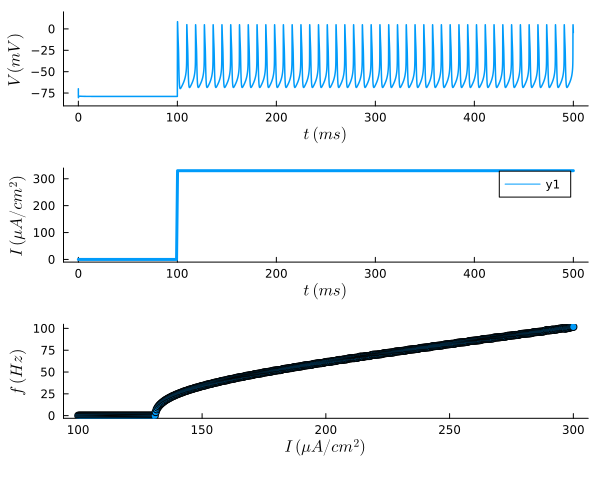

In [76]:
# Change conductance values to get Gaf = 10
GAf=10.; # Fast A-type potassium current maximal conductance

## Initial conditions
V0= -70.; mNa0=mNainf(V0); hNa0=hNainf(V0); mKd0=mKdinf(V0); mAf0=mAfinf(V0); hAf0=hAfinf(V0);
mAs0=mAsinf(V0); hAs0=hAsinf(V0); mCaL0=mCaLinf(V0); mCaT0=mCaTinf(V0); hCaT0=hCaTinf(V0); mH0=mHinf(V0) 
Ca0=(-α*GCaL*mCaL0*(V0-VCa))+(-β*GCaT*mCaT0*hCaT0*(V0-VCa))

x0 = [V0; mNa0; hNa0; mKd0; mAf0; hAf0; mAs0; hAs0; mCaL0; mCaT0; hCaT0; mH0; Ca0]

## Definition of simulation time.
Tfinal=500.0
tspan=(0.0,Tfinal)

## Input current defition
# Constant current
Iapp=0.

# Current pulses
I1=330. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=501 # Ending time of first pulse

It(t)=I1*pulse(t,ti1,tf1) ## Time-varying current

## Current-clamp experiment
# Parameter vector for simulations
p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa,GCaL,GCaT,GH,Gl)

# Simulation
prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
sol = solve(prob,dtmax=0.1);

# Plot spiking mode of the model with the Fast channel
p1=plot(sol.t, sol[1,:],linewidth=1.5,legend=false,ylims=(-90,20))
ylabel!(L"V\ (mV)")
xlabel!(L"t\ (ms)")

# Input current
t=range(0.0,Tfinal,length=500)
p2=plot(t,Iapp .+ It.(t),linewidth=3)
xlabel!(L"t\ (ms)")
ylabel!(L"I\ (\mu A/cm^2)")

l = @layout [
    a{1.0*w,0.3*h}
    b{1.0*w,0.3*h}
    c{1.0*w,0.3*h}
]


# Plot fi curve with Gas = 10 

stim_currents = range(100, 300, 500)
freqs = compute_FI_values(stim_currents)

p3=scatter(stim_currents, freqs,legend=false)
ylabel!(L"f\ (Hz)")
xlabel!(L"I\ (\mu A/cm^2)")
CC=plot(p1,p2,p3,layout=l,grid=false,size=(600,500))#,xlims=(35,55))

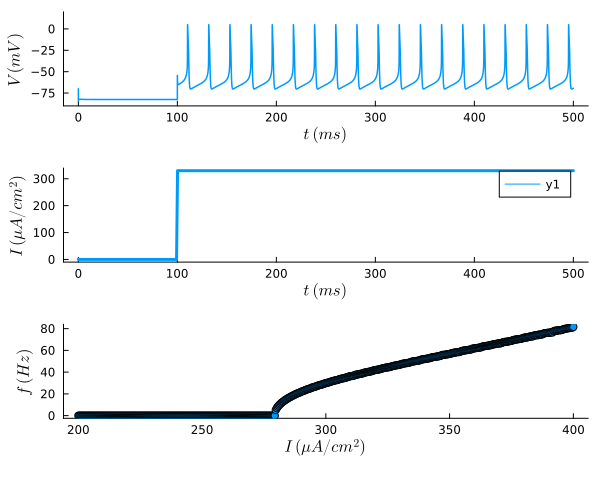

In [77]:
GAf=20.; # Fast A-type potassium current maximal conductance

## Initial conditions
V0= -70.; mNa0=mNainf(V0); hNa0=hNainf(V0); mKd0=mKdinf(V0); mAf0=mAfinf(V0); hAf0=hAfinf(V0);
mAs0=mAsinf(V0); hAs0=hAsinf(V0); mCaL0=mCaLinf(V0); mCaT0=mCaTinf(V0); hCaT0=hCaTinf(V0); mH0=mHinf(V0) 
Ca0=(-α*GCaL*mCaL0*(V0-VCa))+(-β*GCaT*mCaT0*hCaT0*(V0-VCa))

x0 = [V0; mNa0; hNa0; mKd0; mAf0; hAf0; mAs0; hAs0; mCaL0; mCaT0; hCaT0; mH0; Ca0]

## Definition of simulation time.
Tfinal=500.0
tspan=(0.0,Tfinal)

## Input current defition
# Constant current
Iapp=0.

# Current pulses
I1=330. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=501 # Ending time of first pulse

It(t)=I1*pulse(t,ti1,tf1) ## Time-varying current

## Current-clamp experiment
# Parameter vector for simulations
p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa,GCaL,GCaT,GH,Gl)

# Simulation
prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
sol = solve(prob,dtmax=0.1);

# Plot spiking mode of the model with the Fast channel
p1=plot(sol.t, sol[1,:],linewidth=1.5,legend=false,ylims=(-90,20))
ylabel!(L"V\ (mV)")
xlabel!(L"t\ (ms)")

# Input current
t=range(0.0,Tfinal,length=500)
p2=plot(t,Iapp .+ It.(t),linewidth=3)
xlabel!(L"t\ (ms)")
ylabel!(L"I\ (\mu A/cm^2)")

l = @layout [
    a{1.0*w,0.3*h}
    b{1.0*w,0.3*h}
    c{1.0*w,0.3*h}
]


# Plot fi curve with Gas = 10 

stim_currents = range(200, 400, 500)
freqs = compute_FI_values(stim_currents)

p3=scatter(stim_currents, freqs,legend=false)
ylabel!(L"f\ (Hz)")
xlabel!(L"I\ (\mu A/cm^2)")
CC=plot(p1,p2,p3,layout=l,grid=false,size=(600,500))#,xlims=(35,55))

### Student Response:

From both plots it can be seen that adding the A fast channel has made the FI curve continuous. Meaning that adding this channel changed the behavior of the neuron from type 2 excitability to type 1.

Also, as the GAf value increases the spiking threshold increased too. With GAf = 10 the threshold is around 145 µA/cm³ and increasing GAf to 20 it increases the threshold to 290 µA/cm³.

Finally, the firing frequency at a given current decreases as GAf increases which is an effect of the FI curve moving to the right.

## 4. Effect of high-threshold L-type calcium current

We will now add an L-type calcium current to the original model. 

<blockquote>Change the maximal conductance of calcium-activated potassium currents to $G_{K,Ca}=10$ . 
    
   Simulate the model for increasing values of $G_{Ca,L}$ between 0 and 5. What effect do you observe on excitability?</blockquote>

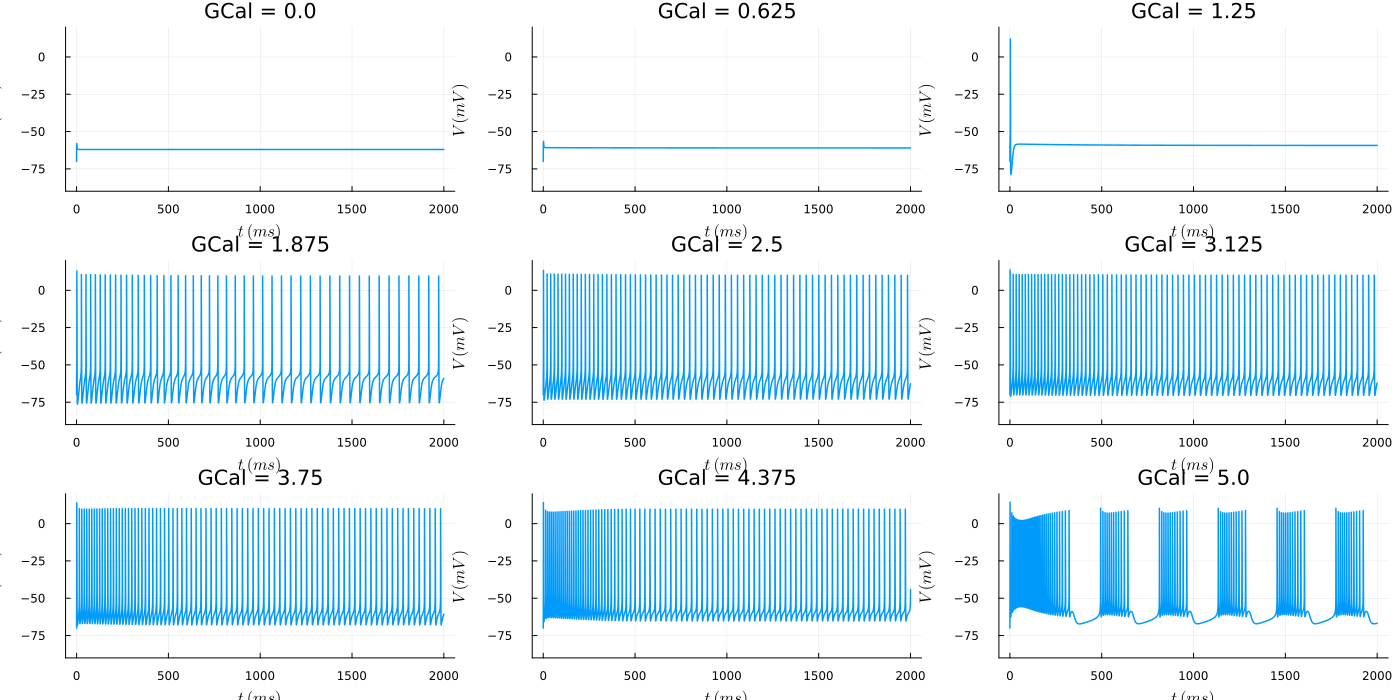

In [78]:
GKCa=10.;
GAf = 0.; 
## Initial conditions
V0= -70.; mNa0=mNainf(V0); hNa0=hNainf(V0); mKd0=mKdinf(V0); mAf0=mAfinf(V0); hAf0=hAfinf(V0);
mAs0=mAsinf(V0); hAs0=hAsinf(V0); mCaL0=mCaLinf(V0); mCaT0=mCaTinf(V0); hCaT0=hCaTinf(V0); mH0=mHinf(V0) 
Ca0=(-α*GCaL*mCaL0*(V0-VCa))+(-β*GCaT*mCaT0*hCaT0*(V0-VCa))
x0 = [V0; mNa0; hNa0; mKd0; mAf0; hAf0; mAs0; hAs0; mCaL0; mCaT0; hCaT0; mH0; Ca0]

# Current pulses
I1 =0. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=2001 # Ending time of first pulse
It(t)=I1*pulse(t,ti1,tf1) ## Time-varying current

Tfinal=2000.0
tspan=(0.0,Tfinal)

GCal_range = range(0, 5, 9)
p_array = Array{Plots.Plot{Plots.GRBackend},1}()
for i = 1:length(GCal_range)
    p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa,GCal_range[i],GCaT,GH,Gl)
    prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
    sol = solve(prob,dtmax=0.1);

    push!(p_array, plot(sol.t, sol[1,:],title = string("GCal = ", GCal_range[i]),linewidth=1.5,legend=false,ylims=(-90,20)))
    ylabel!(L"V\ (mV)")
    xlabel!(L"t\ (ms)")
end

plot(p_array...; layout= 9,size=(1400,700))

    

### Student response:

Increasing the conductivity of the L-type calcium channel increases the fire frequency of the neuron.

In these plots there is no stimulating current meaning that the firing threshold decreases and becomes negative as GCal increases.

Increasing GCal further changes the behavior of continuous spiking to bursts as it can be seen with GCal = 5



<blockquote> Keeping $G_{Ca,L}=5$, sequentially increase than decrease the maximal conductance of calcium-activated potassium currents to $G_{K,Ca}$. 
    
   What effect do you observe on excitability? How do you interpret the effect of the calcium-activated potassium current?</blockquote>

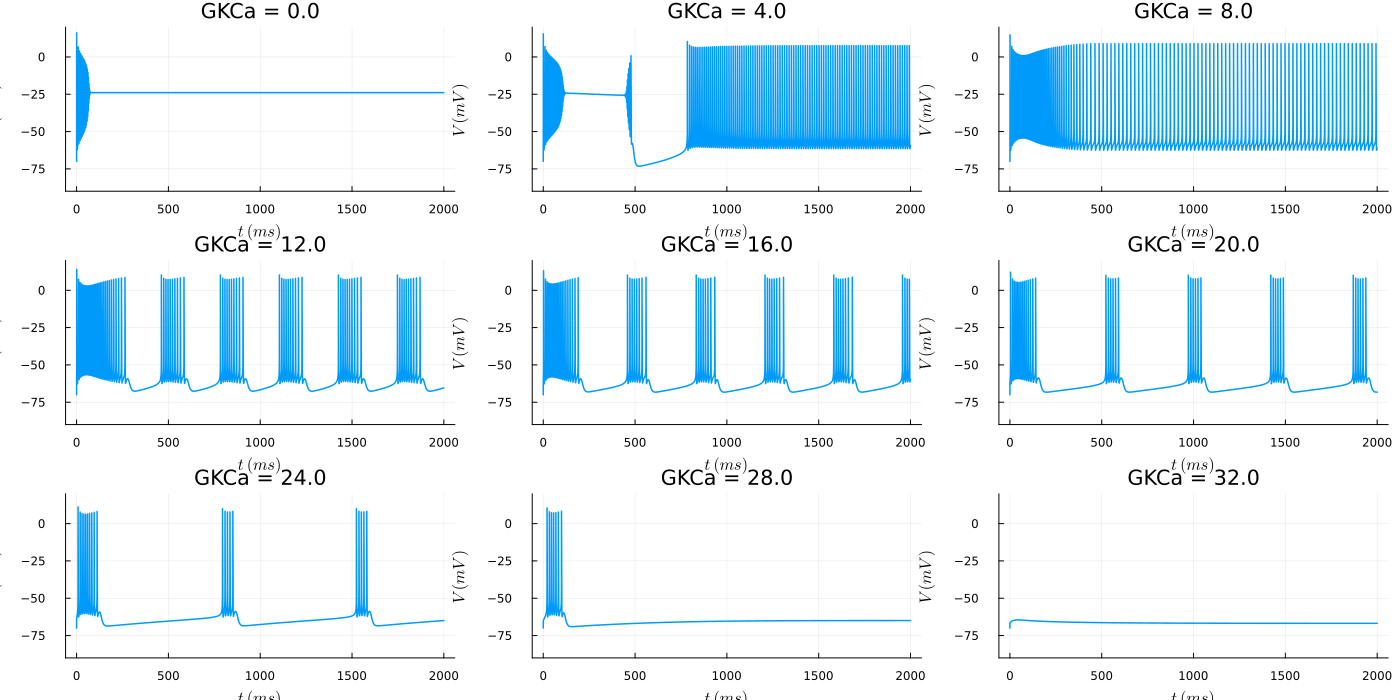

In [79]:
GCal = 5.;
GAf  = 0.; 
GKCa_range =range(0, 32, 9)

## Initial conditions
V0= -70.; mNa0=mNainf(V0); hNa0=hNainf(V0); mKd0=mKdinf(V0); mAf0=mAfinf(V0); hAf0=hAfinf(V0);
mAs0=mAsinf(V0); hAs0=hAsinf(V0); mCaL0=mCaLinf(V0); mCaT0=mCaTinf(V0); hCaT0=hCaTinf(V0); mH0=mHinf(V0) 
Ca0=(-α*GCaL*mCaL0*(V0-VCa))+(-β*GCaT*mCaT0*hCaT0*(V0-VCa))
x0 = [V0; mNa0; hNa0; mKd0; mAf0; hAf0; mAs0; hAs0; mCaL0; mCaT0; hCaT0; mH0; Ca0]

# Current pulses
I1=0. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=2001 # Ending time of first pulse
It(t)=I1*pulse(t,ti1,tf1) ## Time-varying current

Tfinal=2000.0
tspan=(0.0,Tfinal)

p_array = Array{Plots.Plot{Plots.GRBackend},1}()
for i = 1:length(GCal_range)
    p=(Iapp,It,GNa,GKd,GAf,GAs,GKCa_range[i],GCal,GCaT,GH,Gl)
    prob = ODEProblem(CBM_ODE,x0,tspan,p) # Simulation without noise (ODE)
    sol = solve(prob,dtmax=0.1);

    push!(p_array, plot(sol.t, sol[1,:],title = string("GKCa = ", GKCa_range[i]),linewidth=1.5,legend=false,ylims=(-90,20)))
    ylabel!(L"V\ (mV)")
    xlabel!(L"t\ (ms)")
end

plot(p_array...; layout= 9,size=(1400,700))


### Student Response:

Increasing the Calcium activated potassium currents first changes the behavior of the neuron from non spiking at rest to spiking. Increasing it further the behavior changes again to burst firing. Then, as GKCa increases the time between two bursts increases and the burst time decreases until the neuron no longueur bursts.

The calcium activated channel seems to first stimulate the excitability of the neuron up to a point. After this point, calcium activated potassium currents have an inhibitory effect.